<a href="https://colab.research.google.com/github/harrymkwn/TensorFlow/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

In [0]:
tf.set_random_seed(1)
np.random.seed(1)

In [0]:
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise   

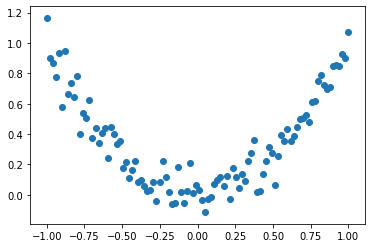

In [7]:
plt.scatter(x,y)
plt.show()

In [0]:
tfx = tf.placeholder(tf.float32,shape=x.shape)
tfy = tf.placeholder(tf.float32,shape=y.shape)

In [0]:
l1 = tf.layers.dense(tfx,10,tf.nn.relu)
output = tf.layers.dense(l1,1)

loss = tf.losses.mean_squared_error(tfy,output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

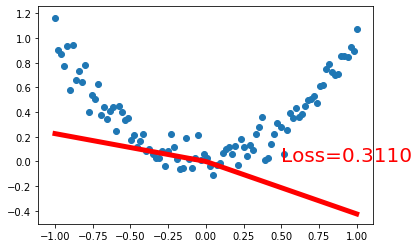

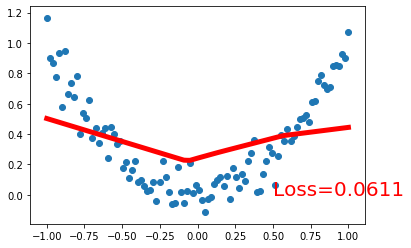

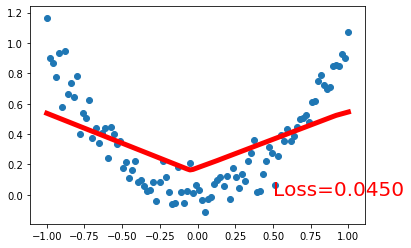

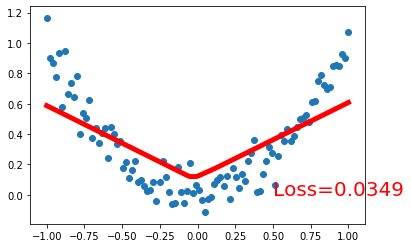

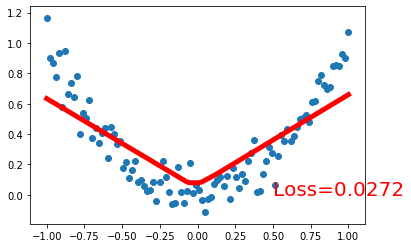

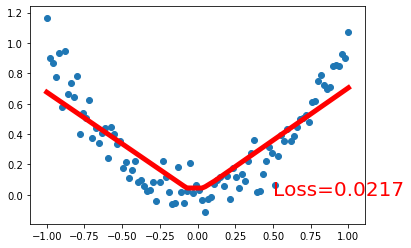

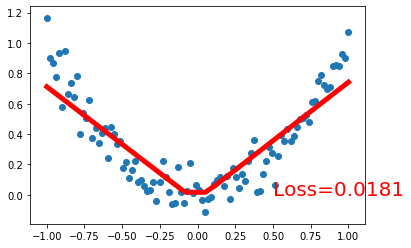

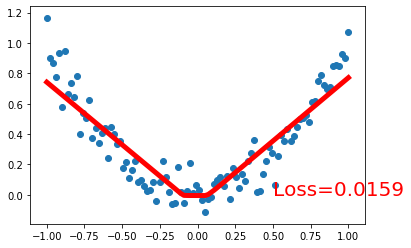

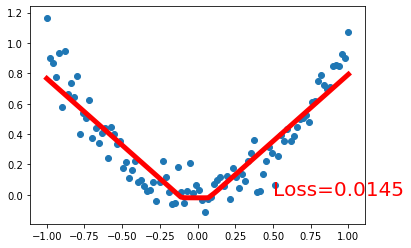

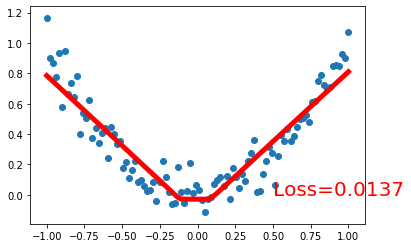

In [28]:
epochs =50
with tf.Session() as sess:
  plt.ion()
  sess.run(init)
  for step in range(epochs):
    _,l,pred = sess.run([train_op,loss,output],{tfx:x,tfy:y})
    if step%5==0:
      plt.cla()
      plt.scatter(x, y)
      plt.plot(x, pred, 'r-', lw=5)
      plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
      plt.pause(0.1)
  plt.ioff()
  plt.show()